<a href="https://colab.research.google.com/github/FabioVCoelho/Univali/blob/master/ProcessamentoDeImagem/Detec%C3%A7%C3%A3o_de_bordas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

class Pixel:
    def __init__(self, x, y):
      self.x = x
      self.y = y

 
def print_img(img):
  #Display the image
  cv2_imshow(img)
  #key binding function
  cv2.waitKey(0)
  #Destroyed all window we created earlier.
  cv2.destroyAllWindows()
 
def gray_tone(array):
  return (array[0] * 0.299 + array[1] * 0.587 + array[2] * 0.114)
 
def image_cinza(imagem):
  new_img = imagem
  for index_img,img_array in enumerate(imagem):
    for index_pixel,pixel in enumerate(img_array):
      new_img[index_img][index_pixel] = gray_tone(pixel)
  return new_img

### Deteção de bordas utilizando o operador de Roberts
Utiliza um par de matrizes 2x2 para encontrar os gradientes nas direções x e y:

<img src="http://www.sciweavers.org/tex2img.php?eq=G_%7Bx%7D%20%3D%20%20%5Cbegin%7Bbmatrix%7D0%20%26%201%20%5C%5C-1%20%26%200%20%5Cend%7Bbmatrix%7D%20%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt="G_{x} =  \begin{bmatrix}0 & 1 \\-1 & 0 \end{bmatrix}  " width="118" height="42" />

<img src="http://www.sciweavers.org/tex2img.php?eq=G_%7By%7D%20%3D%20%20%5Cbegin%7Bbmatrix%7D1%20%26%200%20%5C%5C0%20%26%20-1%20%5Cend%7Bbmatrix%7D%20%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt="G_{y} =  \begin{bmatrix}1 & 0 \\0 & -1 \end{bmatrix}  " width="118" height="42" />

Para determinar onde o pixel avaliado é ou não um pixel de borda, o gradiente é calculado da seguinte forma:

<img src="http://www.sciweavers.org/tex2img.php?eq=%7CG%7C%20%3D%20%20%5Csqrt%7BG_%7Bx%7D%5E%7B2%7D%20%2B%20G_%7By%7D%5E%7B2%7D%7D%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt="|G| =  \sqrt{G_{x}^{2} + G_{y}^{2}} " width="128" height="37" />

Se a magnitude calculada é maior do que um valor limite (parâmetro), o pixel é considerado ser parte de um borda.

A direção do gradiente da borda, perpendicular à direção da borda, é encontrada com a seguinte fórmula:

<img src="http://www.sciweavers.org/tex2img.php?eq=%20%5Calpha%20%3D%20atan%20%5Cbig%28%20%5Cfrac%7BG_%7By%7D%7D%7BG_%7Bx%7D%7D%20%5Cbig%29%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt=" \alpha = atan \big( \frac{G_{y}}{G_{x}} \big) " width="119" height="46" />

In [ ]:
def convolve(imagem,kernel):
  blank_image = np.zeros((len(imagem),len(imagem[0]),3), np.uint8)
  central_point_kernel = len(kernel)//2
  for index_img in range(central_point_kernel,len(imagem) - len(kernel)):
    for index_pixel in range(central_point_kernel,len(imagem[0]) - len(kernel)):
      pixel = Pixel(index_img,index_pixel)
      sum = 0
      for kernel_array in range(0,len(kernel)):
        for kernel_pixel in range(0,len(kernel[0])):
          sum += imagem[pixel.x + kernel_array][pixel.y + kernel_pixel][kernel_pixel] * kernel[kernel_array][kernel_pixel]
      blank_image[pixel.x + central_point_kernel, pixel.y + central_point_kernel] = abs(sum)
  return blank_image

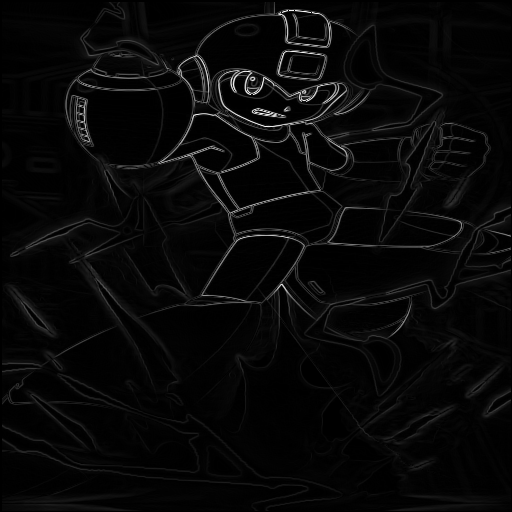

In [ ]:
from math import pow,sqrt

def robert(Gx,Gy):
  blank_image = np.zeros((len(Gx),len(Gx[0]),3), np.uint8)
  for i in range(0, len(Gx)):
    for j in range(0, len(Gx[0])):
      blank_image[i][j] = abs(sqrt(pow(Gx[i][j][0],2) + pow(Gy[i][j][0],2)))
  return blank_image

imagem = image_cinza(cv2.imread('/content/megaman.png'))
kernel_x = [[0,1],[-1,0]]
kernel_y = [[1,0],[0,-1]]
print_img(robert(convolve(imagem,kernel_x),convolve(imagem,kernel_y)))

## Operador de Sobel

Utiliza duas máscaras para encontrar os gradientes vertical e horizontal das bordas.

<img src="http://www.sciweavers.org/tex2img.php?eq=Gy%20%3D%20%5Cbegin%7Bbmatrix%7D1%20%26%202%20%26%201%20%5C%5C0%20%26%200%20%26%200%20%5C%5C-1%20%26%20-2%20%26%20-1%20%5Cend%7Bbmatrix%7D%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt="Gy = \begin{bmatrix}1 & 2 & 1 \\0 & 0 & 0 \\-1 & -2 & -1 \end{bmatrix} " width="175" height="65" />

<img src="http://www.sciweavers.org/tex2img.php?eq=%20G_%7Bx%7D%20%20%3D%20%5Cbegin%7Bbmatrix%7D1%20%26%200%20%26%20-1%20%5C%5C2%20%26%200%20%26%20-2%20%5C%5C1%20%26%200%20%26%20-1%20%5Cend%7Bbmatrix%7D%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt=" G_{x}  = \begin{bmatrix}1 & 0 & -1 \\2 & 0 & -2 \\1 & 0 & -1 \end{bmatrix} " width="147" height="65" />

A fórmula para encontrar o gradiente e o ângulo são muito similares ao operador de Roberts.

A computação de |G| se torna mais complexa. Na prática |G| é aproximada da seguinte forma:

<img src="http://www.sciweavers.org/tex2img.php?eq=%7CG%7C%20%3D%20%7CG_%7Bx%7D%7C%20%2B%20%7CG_%7By%7D%7C&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt="|G| = |G_{x}| + |G_{y}|" width="132" height="21" />

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


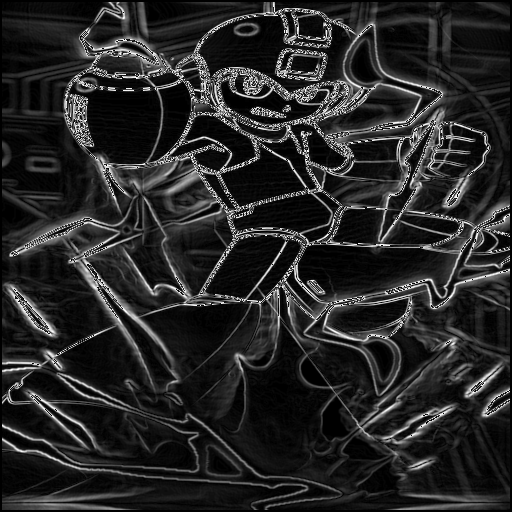

In [ ]:
def sobel(Gx,Gy):
  blank_image = np.zeros((len(Gx),len(Gx[0]),3), np.uint8)
  for i in range(0, len(Gx)):
    for j in range(0, len(Gx[0])):
      blank_image[i][j] = abs(Gx[i][j][0]) + abs(Gy[i][j][0])
  return blank_image

imagem = image_cinza(cv2.imread('/content/megaman.png'))
kernel_x = [[1,2,1],[0,0,0],[-1,-2,-1]]
kernel_y = [[1,0,-1],[2,0,-2],[1,0,-1]]
print_img(sobel(convolve(imagem,kernel_x),convolve(imagem,kernel_y)))

## Operador de Robinson

É similar em operação ao de Sobel, porém usa um conjunto de oito máscaras, onde quatro delas são as seguintes:

<img src="http://www.sciweavers.org/tex2img.php?eq=G_%7B1%7D%20%3D%20%20%5Cbegin%7Bbmatrix%7D1%20%26%202%20%26%201%20%5C%5C0%20%26%200%20%26%200%20%5C%5C%20-1%20%26%20-2%20%26%20-1%20%5Cend%7Bbmatrix%7D&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt="G_{1} =  \begin{bmatrix}1 & 2 & 1 \\0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}" width="174" height="65" />

<img src="http://www.sciweavers.org/tex2img.php?eq=G_%7B2%7D%20%3D%20%20%5Cbegin%7Bbmatrix%7D2%20%26%201%20%26%200%20%5C%5C1%20%26%200%20%26%20-1%20%5C%5C%200%20%26%20-1%20%26%20-2%20%5Cend%7Bbmatrix%7D&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt="G_{2} =  \begin{bmatrix}2 & 1 & 0 \\1 & 0 & -1 \\ 0 & -1 & -2 \end{bmatrix}" width="160" height="65" />

<img src="http://www.sciweavers.org/tex2img.php?eq=G_%7B3%7D%20%3D%20%20%5Cbegin%7Bbmatrix%7D1%20%26%200%20%26%20-1%20%5C%5C2%20%26%200%20%26%20-2%20%5C%5C%201%20%26%200%20%26%20-1%20%5Cend%7Bbmatrix%7D&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt="G_{3} =  \begin{bmatrix}1 & 0 & -1 \\2 & 0 & -2 \\ 1 & 0 & -1 \end{bmatrix}" width="147" height="65" />

<img src="http://www.sciweavers.org/tex2img.php?eq=G_%7B4%7D%20%3D%20%20%5Cbegin%7Bbmatrix%7D0%20%26%20-1%20%26%20-2%20%5C%5C1%20%26%200%20%26%20-1%20%5C%5C%202%20%26%201%20%26%200%20%5Cend%7Bbmatrix%7D&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt="G_{4} =  \begin{bmatrix}0 & -1 & -2 \\1 & 0 & -1 \\ 2 & 1 & 0 \end{bmatrix}" width="160" height="65" />

As outras 4 matrizes são as matrizes opostas das 4 acima.
#### Matriz oposta ou simétrica
É obtida com a troca de sinal dos elementos de uma matriz conhecida.

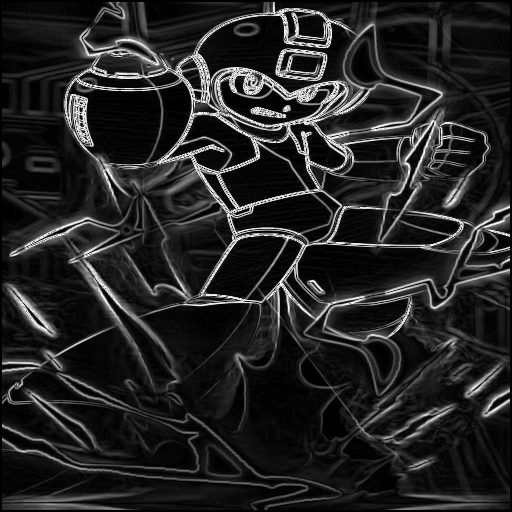

In [ ]:
def robinson():
  imagem = image_cinza(cv2.imread('/content/megaman.png'))
  blank_image = np.zeros((len(imagem),len(imagem[0]),3), np.uint8)
  Kernel1 = [[1,2,1],[0,0,0],[-1,-2,-1]]
  Kernel2 = [[2,1,0],[1,0,-1],[0,-1,-2]]
  Kernel3 = [[1,0,-1],[2,0,-2],[1,0,-1]]
  Kernel4 = [[0,-1,-2],[1,0,-1],[2,1,0]]
  Kernel5 = [[-1,-2,-1],[0,0,0],[1,2,1]]
  Kernel6 = [[-2,-1,0],[-1,0,1],[0,1,2]]
  Kernel7 = [[-1,0,1],[-2,0,2],[-1,0,1]]
  Kernel8 = [[0,1,2],[-1,0,1],[-2,-1,0]]

  conv1 = convolve(imagem,Kernel1)
  conv2 = convolve(imagem,Kernel2)
  conv3 = convolve(imagem,Kernel3)
  conv4 = convolve(imagem,Kernel4)
  conv5 = convolve(imagem,Kernel5)
  conv6 = convolve(imagem,Kernel6)
  conv7 = convolve(imagem,Kernel7)
  conv8 = convolve(imagem,Kernel8)

  for i in range(0, len(imagem)):
    for j in range(0, len(imagem[0])):
      blank_image[i][j] = max([conv1[i][j][0],conv2[i][j][0],conv3[i][j][0],conv4[i][j][0],conv5[i][j][0],conv6[i][j][0],conv7[i][j][0],conv8[i][j][0]])
  return blank_image

print_img(robinson())

## Operador de Canny